ValueError: x and y must have same first dimension, but have shapes (3000,) and (589,)

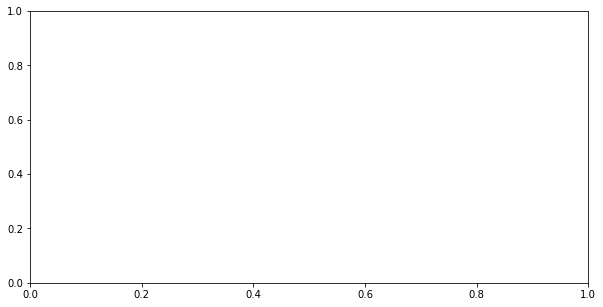

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('store_sales.csv', sep='\t').reset_index()
data = np.array(data)

plt.figure(figsize=(10,5))
plt.plot(np.arange(3000),data[:3000,0])
plt.plot(np.arange(3000,6000), data[3000:6000,2])


In [2]:
from scipy.spatial.distance import cdist

w = 100 # 窓幅
nk = 1 # 近傍点

# 訓練用
Xtr = data[:3000,2] 
# 窓幅ずつ切り出していく
Dtr = np.array([Xtr[i:i+w] for i in range(3001-w)])

# テスト用
X = data[3000:6000,2]
# 窓幅ずつ切り出していく
D = np.array([X[i:i+w] for i in range(3001-w)])

# 距離の計算
D_dist = cdist(D, Dtr, metric='euclidean')

# 異常度の計算
# 近傍点との距離
a = np.min(D_dist, axis=1)

plt.plot(data[3000:6000,2], alpha=.5)
plt.plot(a)


IndexError: index 2 is out of bounds for axis 1 with size 2

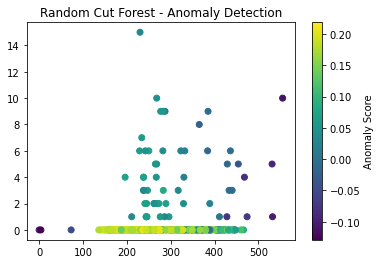

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む（日付を解釈する）
data = pd.read_csv('store_sales.csv', parse_dates=['date'])

# 日付型のカラムを除外する
numerical_data = data.select_dtypes(include=[np.number])

# 欠損値を処理（例: 平均値で置換）
numerical_data = numerical_data.fillna(numerical_data.mean())

# 無限大や非常に大きな値を制限
numerical_data = np.clip(numerical_data, a_min=-1e9, a_max=1e9)

# ランダムカットフォレストモデルの構築
model = IsolationForest(contamination=0.05)  # contaminationは異常率を指定
model.fit(numerical_data)

# データポイントの異常スコアを予測
scores = model.decision_function(numerical_data)

# 結果の可視化
plt.scatter(numerical_data.iloc[:, 0], numerical_data.iloc[:, 1], c=scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title('Random Cut Forest - Anomaly Detection')
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む（日付を解釈する）
data = pd.read_csv('store_sales.csv', parse_dates=['date'])

# 任意の特徴量を選択してx軸とy軸に割り当てる
x_feature = data['date'].values
y_feature = data['BEAUTY'].values

# 選択した特徴量だけのデータを取得
selected_data = data[[x_feature, y_feature]]

# 欠損値を処理（例: 平均値で置換）
selected_data = selected_data.fillna(selected_data.mean())

# 無限大や非常に大きな値を制限
selected_data = np.clip(selected_data, a_min=-1e9, a_max=1e9)

# ランダムカットフォレストモデルの構築
model = IsolationForest(contamination=0.05)  # contaminationは異常率を指定
model.fit(selected_data)

# データポイントの異常スコアを予測
scores = model.decision_function(selected_data)

# 結果の可視化
plt.scatter(selected_data[x_feature], selected_data[y_feature], c=scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title('Random Cut Forest - Anomaly Detection')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


KeyError: "None of [Index([(2013-01-01T00:00:00.000000000, 2013-01-02T00:00:00.000000000, 2013-01-03T00:00:00.000000000, 2013-01-04T00:00:00.000000000, 2013-01-05T00:00:00.000000000, 2013-01-06T00:00:00.000000000, 2013-01-07T00:00:00.000000000, 2013-01-08T00:00:00.000000000, 2013-01-09T00:00:00.000000000, 2013-01-10T00:00:00.000000000, 2013-01-11T00:00:00.000000000, 2013-01-12T00:00:00.000000000, 2013-01-13T00:00:00.000000000, 2013-01-14T00:00:00.000000000, 2013-01-15T00:00:00.000000000, 2013-01-16T00:00:00.000000000, 2013-01-17T00:00:00.000000000, 2013-01-18T00:00:00.000000000, 2013-01-19T00:00:00.000000000, 2013-01-20T00:00:00.000000000, 2013-01-21T00:00:00.000000000, 2013-01-22T00:00:00.000000000, 2013-01-23T00:00:00.000000000, 2013-01-24T00:00:00.000000000, 2013-01-25T00:00:00.000000000, 2013-01-26T00:00:00.000000000, 2013-01-27T00:00:00.000000000, 2013-01-28T00:00:00.000000000, 2013-01-29T00:00:00.000000000, 2013-01-30T00:00:00.000000000, 2013-01-31T00:00:00.000000000, 2013-02-01T00:00:00.000000000, 2013-02-02T00:00:00.000000000, 2013-02-03T00:00:00.000000000, 2013-02-04T00:00:00.000000000, 2013-02-05T00:00:00.000000000, 2013-02-06T00:00:00.000000000, 2013-02-07T00:00:00.000000000, 2013-02-08T00:00:00.000000000, 2013-02-09T00:00:00.000000000, 2013-02-10T00:00:00.000000000, 2013-02-11T00:00:00.000000000, 2013-02-12T00:00:00.000000000, 2013-02-13T00:00:00.000000000, 2013-02-14T00:00:00.000000000, 2013-02-15T00:00:00.000000000, 2013-02-16T00:00:00.000000000, 2013-02-17T00:00:00.000000000, 2013-02-18T00:00:00.000000000, 2013-02-19T00:00:00.000000000, 2013-02-20T00:00:00.000000000, 2013-02-21T00:00:00.000000000, 2013-02-22T00:00:00.000000000, 2013-02-23T00:00:00.000000000, 2013-02-24T00:00:00.000000000, 2013-02-25T00:00:00.000000000, 2013-02-26T00:00:00.000000000, 2013-02-27T00:00:00.000000000, 2013-02-28T00:00:00.000000000, 2013-03-01T00:00:00.000000000, 2013-03-02T00:00:00.000000000, 2013-03-03T00:00:00.000000000, 2013-03-04T00:00:00.000000000, 2013-03-05T00:00:00.000000000, 2013-03-06T00:00:00.000000000, 2013-03-07T00:00:00.000000000, 2013-03-08T00:00:00.000000000, 2013-03-09T00:00:00.000000000, 2013-03-10T00:00:00.000000000, 2013-03-11T00:00:00.000000000, 2013-03-12T00:00:00.000000000, 2013-03-13T00:00:00.000000000, 2013-03-14T00:00:00.000000000, 2013-03-15T00:00:00.000000000, 2013-03-16T00:00:00.000000000, 2013-03-17T00:00:00.000000000, 2013-03-18T00:00:00.000000000, 2013-03-19T00:00:00.000000000, 2013-03-20T00:00:00.000000000, 2013-03-21T00:00:00.000000000, 2013-03-22T00:00:00.000000000, 2013-03-23T00:00:00.000000000, 2013-03-24T00:00:00.000000000, 2013-03-25T00:00:00.000000000, 2013-03-26T00:00:00.000000000, 2013-03-27T00:00:00.000000000, 2013-03-28T00:00:00.000000000, 2013-03-29T00:00:00.000000000, 2013-03-30T00:00:00.000000000, 2013-03-31T00:00:00.000000000, 2013-04-01T00:00:00.000000000, 2013-04-02T00:00:00.000000000, 2013-04-03T00:00:00.000000000, 2013-04-04T00:00:00.000000000, 2013-04-05T00:00:00.000000000, 2013-04-06T00:00:00.000000000, 2013-04-07T00:00:00.000000000, 2013-04-08T00:00:00.000000000, 2013-04-09T00:00:00.000000000, 2013-04-10T00:00:00.000000000, ...), (2, 207, 125, 133, 191, 265, 124, 116, 104, 96, 95, 165, 228, 89, 110, 139, 116, 89, 166, 216, 123, 106, 86, 76, 92, 167, 181, 113, 90, 95, 114, 146, 239, 246, 150, 132, 132, 108, 141, 177, 111, 115, 134, 107, 80, 104, 217, 175, 111, 104, 118, 96, 90, 141, 192, 112, 83, 82, 104, 125, 209, 238, 127, 94, 88, 100, 89, 171, 208, 92, 111, 95, 100, 80, 168, 192, 109, 85, 101, 78, 73, 132, 162, 111, 83, 96, 96, 137, 158, 193, 141, 118, 89, 92, 87, 182, 196, 120, 105, 105, ...)], dtype='object')] are in the [columns]"

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む（日付を解釈する）
data = pd.read_csv('store_sales.csv', parse_dates=['date'])

# 任意の特徴量を選択してx軸とy軸に割り当てる
x_feature = 'date'  # エポック秒に変換した 'date' 列を使う
y_feature = 'BEAUTY'

# 欠損値を処理（例: 平均値で置換）
data = data.fillna(data.mean())

# 無限大や非常に大きな値を制限
data = np.clip(data, a_min=-1e9, a_max=1e9)

# ランダムカットフォレストモデルの構築
model = IsolationForest(contamination=0.05)  # contaminationは異常率を指定
model.fit(data)

# データポイントの異常スコアを予測
scores = model.decision_function(data)

# 結果の可視化
plt.scatter(data[x_feature], data[y_feature], c=scores, cmap='viridis')
plt.colorbar(label='Anomaly Score')
plt.title('Random Cut Forest - Anomaly Detection')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


<ipython-input-21-11e5085eace2>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


TypeError: '>=' not supported between instances of 'Timestamp' and 'float'

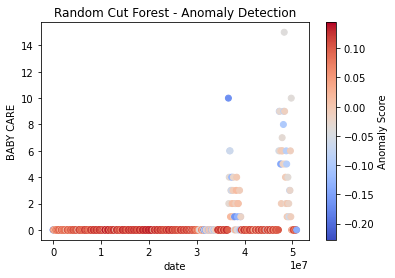

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む（日付を解釈する）
data = pd.read_csv('store_sales.csv', parse_dates=['date'])

# 任意の特徴量を選択してx軸とy軸に割り当てる
x_feature = 'date'
y_feature = 'BABY CARE'

# 日付データをエポック秒に変換
data[x_feature] = (data[x_feature] - pd.Timestamp("2013-01-01")) // pd.Timedelta('1s')

# 欠損値を処理（均値で置換）
data = data.fillna(data.mean())

# 無限大や非常に大きな値を制限
data = np.clip(data, a_min=-1e9, a_max=1e9)

# ランダムカットフォレストモデルの構築
#model = IsolationForest(contamination=0.05)  # contaminationは異常率を指定
model = IsolationForest()
model.fit(data)

# データポイントの異常スコアを予測
scores = model.decision_function(data)

# 結果の可視化
plt.scatter(data[x_feature], data[y_feature], c=scores, cmap='coolwarm')
plt.colorbar(label='Anomaly Score')
plt.title('Random Cut Forest - Anomaly Detection')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()


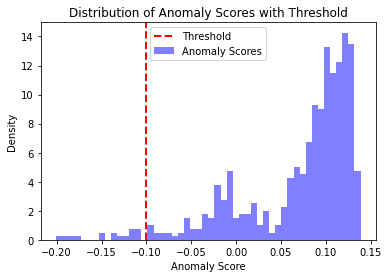

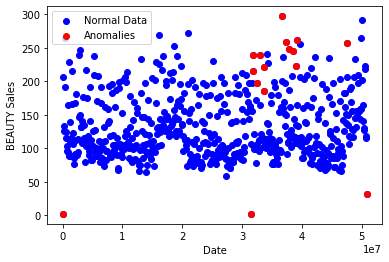

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む（日付を解釈する）
data = pd.read_csv('store_sales.csv', parse_dates=['date'])

# 任意の特徴量を選択してx軸とy軸に割り当てる
x_feature = 'date'
y_feature = 'BABY CARE'

# 日付データをエポック秒に変換
data[x_feature] = (data[x_feature] - pd.Timestamp("2013-01-01")) // pd.Timedelta('1s')

# 欠損値を処理（均値で置換）
data = data.fillna(data.mean())

# 無限大や非常に大きな値を制限
data = np.clip(data, a_min=-1e9, a_max=1e9)

# ランダムカットフォレストモデルの構築
#model = IsolationForest(contamination=0.05)  # contaminationは異常率を指定
model = IsolationForest()
model.fit(data)
# データポイントの異常スコアを予測
scores = model.decision_function(data)

# 異常スコアの分布を可視化
plt.hist(scores, bins=50, density=True, alpha=0.5, color='blue', label='Anomaly Scores')

# 適切な閾値を設定（-1～0の範囲、閾値よりも小さい値が異常値と判断される）
threshold = -0.1
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')

plt.title('Distribution of Anomaly Scores with Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# 閾値を超えるデータポイントを異常として可視化
anomalies = data[scores < threshold]
plt.scatter(data['date'], data['BEAUTY'], c='blue', label='Normal Data')
plt.scatter(anomalies['date'], anomalies['BEAUTY'], c='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('BEAUTY Sales')
plt.legend()
plt.show()